## Corey Solitaire
### advancecd_dataframes
#### 8/14/2020

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(12, 6))
from pydataset import data

# Advanced Dataframes Exercises

In [53]:
"""
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset
"""

"\nmpg = data('mpg') # load the dataset and store it in a variable\n# data('mpg', show_doc=True) # view the documentation for the dataset\n"

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [54]:
mpg_df = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [55]:
# a. On average, which manufacturer has the best miles per gallon

"""
First I visualized the dataset with .head()
"""
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [56]:
"""
In order to determine the best mpg I neeed to make a new colum ave_mpg
I made that colum using the .assign method and set it equil to the average milage between hwy and city
"""

mpg_df = mpg_df.assign(avg_mpg = (mpg_df.cty + mpg_df.hwy) /2)
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [57]:
"""
Once the column was added to my dataframe I sorted the ave_mpg and manufcature
to find which  manufacturer had the best ave_mpg
"""

mpg_df.sort_values(by=['avg_mpg', 'manufacturer'], ascending = False)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...
127,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5


In [58]:
# How many different manufacturers are there?

"""
To determine the number of manufactures i used the .agg method to count the nunique
values

"""
mpg_df.manufacturer.agg('nunique')


15

In [59]:
# How many different models are there?

"""
The first step to verify count (38 Rows)
"""
#mpg_df.groupby('model').describe()

"""
Apply len function to return an answer
"""
len(mpg_df.groupby('model').describe())

"""
As above this problem could also be solved using len(mpg.model.unique())
"""

'\nAs above this problem could also be solved using len(mpg.model.unique())\n'

In [60]:
# Do automatic or manual cars have better miles per gallon?

"""
To answer this question I first shorted my df by avg_mpg and transmission type, ascencing false
to return me the transmission types with the greatest ave_mpg
"""

mpg_df.sort_values(by=['avg_mpg', 'trans'], ascending = False)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
100,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...
70,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5
55,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
60,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5


### 2. Joining and Merging

In [61]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [62]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [63]:
# Copy the users and roles dataframes from the examples above. What do you think a right join would look like?  

"""
pd.merge(left, right, how="type_of_join", left_on="key from the left", right_on="key from the right df")
Left = NAME of 1st Dataframe
Right = NAME of 2nd Dataframe
LEFT JOIN means keep all the USERS even if they don't have a role...
"""

users_with_roles = pd.merge(users, roles, left_on='role_id', right_on='id', how='left')
users_with_roles


,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [64]:
# An outer join? (100 % Inclusive of Null Values)

users_with_roles_all_null = pd.merge(users, roles, left_on = 'role_id', right_on = 'id' , how = 'outer')
users_with_roles_all_null

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [65]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?


"""
Dropped Id Column
"""
users_test = pd.DataFrame({
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
})
users_test

,name
0,bob
1,joe
2,sally
3,adam
4,jane
5,mike


In [66]:
"""
Dropped role ID Column
"""


roles_test = pd.DataFrame({
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles_test

,name
0,admin
1,author
2,reviewer
3,commenter


In [67]:
# The merging...

"""
The files still merge, but all the names are squished togher in a single series value
"""
no_foreign_key = pd.merge(users_test, roles_test, left_on = 'name', right_on = 'name' , how = 'outer')
no_foreign_key


,name
0,bob
1,joe
2,sally
3,adam
4,jane
5,mike
6,admin
7,author
8,reviewer
9,commenter


### 3. Getting data from SQL databases

In [68]:
# Create a function named get_db_url. It should accept a 
# username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')


In [69]:
# Use your function to obtain a connection to the employees database.

pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [70]:
# Once you have successfully run a query:
#  - Intentionally make a typo in the database url. What kind of error message do you see?
"""
 No it took me too long to get the function right.  It will just tell me that the database I am looking
 for does not exist.  Ryan alreay demonstrated in Class.
"""

'\n No it took me too long to get the function right.  It will just tell me that the database I am looking\n for does not exist.  Ryan alreay demonstrated in Class.\n'

In [71]:
#   -Intentionally make an error in your SQL query. What does the error message look like?

pd.read_sql('SELECT genders FROM employees LIMIT 5 OFFSET 50', url)

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 'genders' in 'field list'")
[SQL: SELECT genders FROM employees LIMIT 5 OFFSET 50]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [72]:
# Read the employees and titles tables into two separate dataframes

employees_df = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [73]:
titles_df = pd.DataFrame(pd.read_sql('SELECT * FROM titles', url))
titles_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [74]:
# Visualize the number of employees with each title.
"""
First we need to find current employees
"""

current_employees = titles_df[titles_df.to_date == titles_df.to_date.max()]
current_employees

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...
443300,499995,Engineer,1997-06-02,9999-01-01
443302,499996,Senior Engineer,2002-05-13,9999-01-01
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01


In [75]:
"""
Next we need to group employees by titles, and use the .sum() method to aggregate results
"""
cur_emp_title = current_employees.groupby('title').emp_no.agg(['count'])
cur_emp_title 

,count
title,
Assistant Engineer,3588
Engineer,30983
Manager,9
Senior Engineer,85939
Senior Staff,82024
Staff,25526
Technique Leader,12055


<function matplotlib.pyplot.show(*args, **kw)>

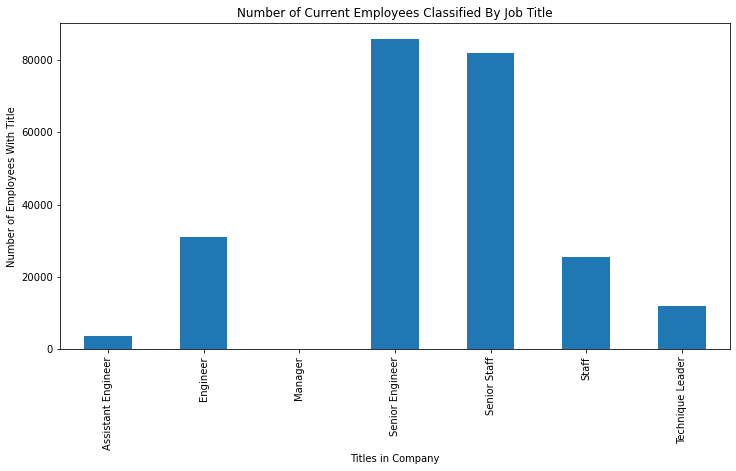

In [76]:
"""
Visualized Data
"""

cur_emp_title.sum(axis=1).plot.bar()
plt.title  ("Number of Current Employees Classified By Job Title")
plt.xlabel ("Titles in Company")
plt.ylabel ("Number of Employees With Title")
plt.show



In [77]:
# Join the employees and titles dataframes together.

"""
I first needed to sort titles by cur_date
"""
titles_df = titles_df[titles_df.to_date == titles_df.to_date.max()]

In [78]:
employee_and_title_merge = pd.merge(employees_df, titles_df, left_on='emp_no', right_on='emp_no', how='inner')
employee_and_title_merge

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [79]:
# Visualize how frequently employees change titles.

"""
Since i sorted my previous data frames to solve the previous problem, i decide to make 
some new dataframes to solve my new problems.  That means another SQL search and new
variable names
"""

employees_all_df = pd.DataFrame(pd.read_sql('SELECT * FROM employees', url))
employees_all_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [80]:
titles_all_df = pd.DataFrame(pd.read_sql('SELECT * FROM titles', url))
titles_all_df.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [81]:
"""
Now lets stick them back together
"""
employee_and_title_merge_all = pd.merge(employees_all_df, titles_all_df, left_on='emp_no', right_on='emp_no', how='inner')
employee_and_title_merge_all

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [82]:
"""
Sorted by the values I car about
"""
employee_and_title_merge_all.sort_values(by =['emp_no','title'])

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [83]:
"""
Now to group it by emp_no to see duplicate titles
"""

#employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').count()
employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').title.count()

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

In [84]:
"""
Now lets make a hist 
"""
emp_no_title_count_df = pd.DataFrame(employee_and_title_merge_all.sort_values(by =['emp_no','title']).groupby('emp_no').title.count())
emp_no_title_count_df


#(kind = 'barh')
#list_to_graph = list(emp_title_counts)
#list_to_graph


,title
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2
...,...
499995,1
499996,2
499997,2


Text(0, 0.5, '# of Employees')

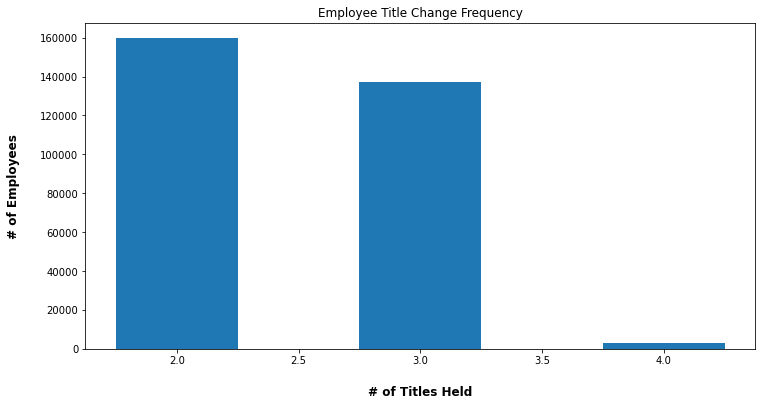

In [85]:
 """
Lets see if it works when i run my column name inside of my hist() method
 """
hist = emp_no_title_count_df.plot.hist(bins = [1,2,3,4], align = "right", rwidth=0.5, legend = False)

hist.set_title("Employee Title Change Frequency")

hist.set_xlabel("# of Titles Held", labelpad=20, weight='bold', size=12)

hist.set_ylabel("# of Employees", labelpad=20, weight='bold', size=12)

In [86]:
# For each title, find the hire date of the employee that was hired most recently with that title.
"""
Search for the correct information
"""
sorted_hire_title_df = pd.DataFrame(employee_and_title_merge.sort_values(by=['title', 'hire_date']))
sorted_hire_title_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
2448,13029,1960-12-26,Selwyn,Demke,F,1985-02-02,Assistant Engineer,1998-08-05,9999-01-01
15034,28714,1953-05-04,Arco,Poehlman,M,1985-02-02,Assistant Engineer,1996-11-25,9999-01-01
26450,42942,1952-10-11,Mansur,Bolotov,F,1985-02-03,Assistant Engineer,1998-08-02,9999-01-01
127166,258686,1964-04-08,Tetsushi,Eickenmeyer,M,1985-02-03,Assistant Engineer,1998-08-23,9999-01-01
73817,102048,1963-09-10,Katsuyuki,Boyle,F,1985-02-05,Assistant Engineer,1999-10-30,9999-01-01
...,...,...,...,...,...,...,...,...,...
214480,467839,1960-05-02,Huan,Capobianchi,M,1999-10-21,Technique Leader,1999-10-21,9999-01-01
79151,108697,1963-05-28,Quingbo,Kambil,M,1999-10-30,Technique Leader,1999-10-30,9999-01-01
1365,11697,1957-12-20,JoAnne,Merey,F,1999-11-06,Technique Leader,1999-12-10,9999-01-01
50558,73027,1959-11-28,Arto,Spinelli,M,1999-12-02,Technique Leader,1999-12-02,9999-01-01


In [87]:
"""
Print out the information you want
"""
# grouping values by title and filtering for the latest hire date among current employees for each position
recent_hires = employee_and_title_merge_all.groupby('title').hire_date.agg(['max'])

# display results
recent_hires


,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-28
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-31


In [88]:
# Write the code necessary to create a cross tabulation of the number of titles by department. 
#  (Hint: this will involve a combination of SQL and python/pandas code)

"""
Reading dept_emp table into DF. we will need this so we can connect dept names with titles
"""

dept_emp = pd.read_sql('SELECT * FROM dept_emp', url)

"""
reading departments table into DF. we will need this so we can see department names instead 
of just dept numbersdepts = pd.read_sql('SELECT * FROM departments', url)
"""

depts = pd.read_sql('SELECT * FROM departments', url)

In [89]:
"""
creating DF that only holds employees with to_date equal to today or later via to_datetime 
(ie. current employee departments)
"""
current_dept = dept_emp[dept_emp['to_date'] >= pd.to_datetime('today')]

In [90]:
"""
# creating DF that only holds titles with to_date equal to today or later via to_datetime 
(ie. current employee titles)
"""

current_titles = titles_all_df[titles_all_df['to_date'] >= pd.to_datetime('today')] 

In [91]:
"""
# merging via inner join the current department DF with departments DF 
(no date filtering needed for departments since there are no dates in that table)
"""

depts_and_dept_emps = pd.merge(current_dept, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')

In [92]:
"""
# merging the current titles DF with the previous DF via inner join
"""

titles_depts = pd.merge(depts_and_dept_emps, current_titles, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')

In [93]:
"""
# creating crosstab for dept_name and titles
"""

titles_depts_xtab = pd.crosstab(titles_depts.dept_name, titles_depts.title)

In [94]:
"""
# displaying results
"""

titles_depts_xtab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [95]:
from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('chipotle')

chipotle = pd.read_sql('SELECT * FROM orders', url)

chipotle

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [96]:
# What is the total price for each order?

"""
To determine the total price per order i first needed to aggregate the order id in to orders and then aggregate 
the total.  This was problematic because of formatting (money) so I first had re replace all the extranious money
symbols with nothing, then had  save as a float value.

After the data was formatted properly i then grouped by order id and aggregated money by sum
"""

chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
total_price = chipotle_money.groupby('order_id').money_price.agg(['sum'])
total_price

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [97]:
# What are the most popular 3 items?

"""
The most popular items in the menu I found using the .groupby method, and aggregating the quantitiy
series using 'sum'. To return the three lartest I used the .nlargest method
"""

chipotle_item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
chipotle_item_counts.nlargest(3, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


In [98]:
# Which item has produced the most revenue?

"""
To determine the item on the menu that has produce the most revenu I had first formatt the item_price
series.  After the series was in a usable form i used the .groupby method by 'item name' and aggregated money
using sum. The item that produced the most revenu was found using the .nlargest function
"""

chipotle_money = chipotle.assign(money_price = chipotle['item_price'].str.replace('$','').astype(float))
chipotle_item_revenue = chipotle_money.groupby('item_name').money_price.agg(['sum'])
chipotle_item_revenue.nlargest(1, 'sum', keep='all')

,sum
item_name,
Chicken Bowl,7342.73
